In [ ]:
!pip install tensorflow opencv-python-headless matplotlib



In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 100
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)



val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 4294 images belonging to 1 classes.
Found 1073 images belonging to 1 classes.


In [ ]:
!pip install streamlit
!pip install pyngrok


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
!ngrok config add-authtoken "2yiTJ3E8GQcBFle4sfojDY0AdyA_522nYpXuceTUizEA81u42"



Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model = load_model('face_mask_model.h5')  # Make sure this file is in Colab

st.title("Face Mask Detection App")

uploaded_file = st.file_uploader("Upload an Image", type=["jpg", "png", "jpeg"])
if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(100, 100))
    st.image(img, caption="Uploaded Image", use_column_width=True)

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "😷 Mask Detected" if prediction < 0.5 else "❌ No Mask Detected"
    st.write("## Prediction:", label)


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Start the tunnel
public_url = ngrok.connect(8501)
print("🚀 Public URL:", public_url)

# Start streamlit in background
!streamlit run app.py &>/dev/null &


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/archive (4)'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,         # 👈 use full path
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

print(train_generator.class_indices)


Found 6083 images belonging to 2 classes.
Found 1520 images belonging to 2 classes.
{'with_mask': 0, 'without_mask': 1}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 196s 777ms/step - accuracy: 0.7305 - loss: 0.5145 - val_accuracy: 0.9118 - val_loss: 0.2295
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 139s 730ms/step - accuracy: 0.8910 - loss: 0.2621 - val_accuracy: 0.9428 - val_loss: 0.1653
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 184s 966ms/step - accuracy: 0.9191 - loss: 0.2033 - val_accuracy: 0.9276 - val_loss: 0.2005
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 138s 724ms/step - accuracy: 0.9480 - loss: 0.1426 - val_accuracy: 0.9474 - val_loss: 0.1845
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 148s 774ms/step - accuracy: 0.9442 - loss: 0.1460 - val_accuracy: 0.9454 - val_loss: 0.1512
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 137s 718ms/step - accuracy: 0.9628 - loss: 0.0957 - val_accuracy: 0.9461 - val_loss: 0.1558
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.9682 - loss: 0.0908 - val_accuracy: 0.9467 - val_loss: 0.1652
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 145s 757ms/step - accuracy: 0.9746 - lo

In [ ]:
model.save("face_mask_model.h5")


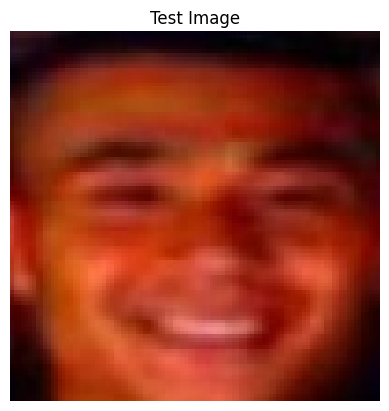

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Prediction: No Mask ❌


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/without_mask_9.jpg'  # path to your test image
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

# Remember your classes:
# {'with_mask': 0, 'without_mask': 1}
label = "With Mask 😷" if prediction < 0.5 else "No Mask ❌"
print("Prediction:", label)


In [ ]:
pip install playsound opencv-python


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=9a7f024a6dae4871ca5a49f0b716ff819a08ae4e9ce7589db93f164b7d5ee7d0
  Stored in directory: /root/.cache/pip/wheels/50/98/42/62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound


In [ ]:
import os

def beep():
    # Windows
    if os.name == 'nt':
        import winsound
        winsound.Beep(1000, 300)  # frequency, duration
    else:
        # Mac/Linux
        os.system('beep -f 1000 -l 300')


In [ ]:
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import os

model = load_model("face_mask_model.h5")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def beep():
    if os.name == 'nt':
        import winsound
        winsound.Beep(1000, 300)
    else:
        os.system('beep -f 1000 -l 300')

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.1, 4)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face = cv2.resize(face, (100, 100))
        face = img_to_array(face) / 255.0
        face = np.expand_dims(face, axis=0)

        pred = model.predict(face)[0][0]
        label = "With Mask" if pred < 0.5 else "No Mask"
        color = (0, 255, 0) if label == "With Mask" else (0, 0, 255)

        # Draw rectangle + label
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

        # Trigger beep alert if no mask
        if label == "No Mask":
            beep()

    cv2_imshow(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


AttributeError: 'NoneType' object has no attribute 'clip'

In [ ]:
from google.colab.patches import cv2_imshow


Saving with_mask_89.jpg to with_mask_89 (2).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


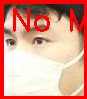

Prediction: No Mask ❌


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Load your trained model
model = load_model("/content/face_mask_model.h5")

# Upload an image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = cv2.imread(img_path)
image_resized = cv2.resize(image, (100, 100))
img_array = img_to_array(image_resized) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]
label = "With Mask 😷" if prediction < 0.5 else "No Mask ❌"
color = (0, 255, 0) if prediction < 0.5 else (0, 0, 255)

# Add visual alert
cv2.putText(image, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
cv2.rectangle(image, (0, 0), (image.shape[1], image.shape[0]), color, 5)

# Show result
cv2_imshow(image)
print("Prediction:", label)


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('face_mask_model.h5')


Saving with_mask_89.jpg to with_mask_89.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
🔍 Raw prediction score: 0.5611865


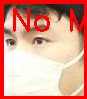

✅ Prediction: No Mask ❌
📊 Confidence: 56.119998931884766%


In [ ]:
from google.colab import files
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load image
image = cv2.imread(img_path)
image_resized = cv2.resize(image, (100, 100))  # use same size as training
img_array = image_resized / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]
print("🔍 Raw prediction score:", prediction)

# Label & confidence
label = "With Mask 😷" if prediction < 0.5 else "No Mask ❌"
confidence = round((1 - prediction) * 100, 2) if prediction < 0.5 else round(prediction * 100, 2)

# Draw result on image
color = (0, 255, 0) if label == "With Mask 😷" else (0, 0, 255)
cv2.putText(image, f"{label} ({confidence}%)", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
cv2.rectangle(image, (0, 0), (image.shape[1], image.shape[0]), color, 5)

# Show image
cv2_imshow(image)

# Final output
print(f"✅ Prediction: {label}")
print(f"📊 Confidence: {confidence}%")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224  # MobileNetV2 expects 224x224

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    validation_split=0.2  # Use 20% data for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (4)',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive (4)',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6083 images belonging to 2 classes.
Found 1520 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  # You can increase to 15–20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 85/191 ━━━━━━━━━━━━━━━━━━━━ 11:51 7s/step - accuracy: 0.6527 - loss: 0.6390

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 1667s 8s/step - accuracy: 0.7448 - loss: 0.5064 - val_accuracy: 0.9711 - val_loss: 0.1080
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.9561 - loss: 0.1381 - val_accuracy: 0.9704 - val_loss: 0.0845
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.9654 - loss: 0.0934 - val_accuracy: 0.9737 - val_loss: 0.0709
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.9666 - loss: 0.0812 - val_accuracy: 0.9730 - val_loss: 0.0750
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.9749 - loss: 0.0681 - val_accuracy: 0.9743 - val_loss: 0.0704
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.9797 - loss: 0.0589 - val_accuracy: 0.9763 - val_loss: 0.0639
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 397s 2s/step - accuracy: 0.9804 - loss: 0.0573 - val_accuracy: 0.9836 - val_loss: 0.0436
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.9731 - loss: 0.0635 - val_accuracy: 0.98

In [ ]:
model.save("mobilenet_face_mask_model.h5")


In [ ]:
base_model.trainable = True

model.compile(optimizer=Adam(1e-5),  # Lower LR for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/191 ━━━━━━━━━━━━━━━━━━━━ 11:06 7s/step - accuracy: 0.6014 - loss: 0.7016

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


191/191 ━━━━━━━━━━━━━━━━━━━━ 1856s 9s/step - accuracy: 0.6589 - loss: 0.6235 - val_accuracy: 0.8941 - val_loss: 0.2965
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1369s 7s/step - accuracy: 0.9312 - loss: 0.2160 - val_accuracy: 0.9618 - val_loss: 0.1211
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1396s 7s/step - accuracy: 0.9700 - loss: 0.1045 - val_accuracy: 0.9829 - val_loss: 0.0646
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1352s 7s/step - accuracy: 0.9833 - loss: 0.0668 - val_accuracy: 0.9829 - val_loss: 0.0463
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 1373s 7s/step - accuracy: 0.9838 - loss: 0.0557 - val_accuracy: 0.9862 - val_loss: 0.0336


In [ ]:
pip install tensorflow keras opencv-python playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=a805c27f793aee33c206884e49b1a4d6bf2ca6a990432017d896b2876500d246
  Stored in directory: /root/.cache/pip/wheels/50/98/42/62753a9e1fb97579a0ce2f84f7db4c21c09d03bb2091e6cef4
Successfully built playsound


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from playsound import playsound
import threading

# Load model
model = load_model('/content/drive/MyDrive/face_mask_model/face_mask_model.h5')

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Play buzzer sound (non-blocking)
def play_buzzer():
    threading.Thread(target=playsound, args=('/content/buzz-buzz-95806.mp3',), daemon=True).start()

# Start video stream
cap = cv2.VideoCapture(0)

labels_dict = {0: 'Mask', 1: 'No Mask'}
color_dict = {0: (0,255,0), 1: (0,0,255)}

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for x, y, w, h in faces:
        face_img = frame[y:y+h, x:x+w]
        resized = cv2.resize(face_img, (128,128))  # use model input size
        normalized = resized / 255.0
        reshaped = np.reshape(normalized, (1,128,128,3))  # change shape as per model

        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]  # 0 or 1

        # Draw rectangle & label
        cv2.rectangle(frame, (x,y), (x+w,y+h), color_dict[label], 2)
        cv2.putText(frame, labels_dict[label], (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_dict[label], 2)

        # Trigger buzzer if No Mask
        if label == 1:
            play_buzzer()

    cv2.imshow('Face Mask Detector', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from flask import Flask, render_template, Response
import cv2
import numpy as np
from keras.models import load_model
from playsound import playsound
import threading

app = Flask(__name__)

# Load model
model = load_model("/content/drive/MyDrive/face_mask_model/face_mask_model.h5")
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

labels_dict = {0: "Mask", 1: "No Mask"}
color_dict = {0: (0, 255, 0), 1: (0, 0, 255)}

def play_buzzer():
    threading.Thread(target=playsound, args=("/content/buzz-buzz-95806.mp3",), daemon=True).start()

def gen_frames():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for x, y, w, h in faces:
            face = frame[y:y+h, x:x+w]
            resized = cv2.resize(face, (128,128))
            reshaped = np.reshape(resized / 255.0, (1,128,128,3))

            result = model.predict(reshaped)
            label = np.argmax(result, axis=1)[0]

            cv2.rectangle(frame, (x, y), (x+w, y+h), color_dict[label], 2)
            cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color_dict[label], 2)

            if label == 1:
                play_buzzer()

        ret, buffer = cv2.imencode('.jpg', frame)
        frame = buffer.tobytes()

        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

    cap.release()

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/video_feed')
def video_feed():
    return Response(gen_frames(), mimetype='multipart/x-mixed-replace; boundary=frame')

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
import cv2
import numpy as np

def capture_image():
    js = Javascript('''
        async function takePhoto() {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getTracks().forEach(track => track.stop());
          div.remove();
          return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = b''.join([bytes([ord(x)]) for x in data.split(',')[1]])
    with open("photo.jpg", "wb") as f:
        f.write(binary)

    return "photo.jpg"


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/face_mask_model/improved_face_mask_model.h5')


In [ ]:
def take_photo(return_image=True):
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    import base64
    import io
    from PIL import Image

    js = Javascript('''
      async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        div.appendChild(video);
        document.body.appendChild(div);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', 0.8);
      }
      takePhoto();
    ''')
    display(js)

    data = eval_js("takePhoto()")
    header, encoded = data.split(",", 1)
    binary = base64.b64decode(encoded)

    image = Image.open(io.BytesIO(binary))
    image.save("photo.jpg")

    if return_image:
        return image
    else:
        return "photo.jpg"


In [ ]:
image = take_photo()
image.show()  # Should display the captured photo in Colab output


<IPython.core.display.Javascript object>

In [ ]:
# Load model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/fine_tuned_face_mask_model.h5", compile=False)

# Resize to match model input (224x224), normalize, reshape
img = image.resize((224, 224))
img = np.array(img) / 255.0
img = np.reshape(img, (1, 224, 224, 3))

# Predict
pred = model.predict(img)
label = np.argmax(pred)

# Show result
if label == 0:
    print("✅ MASK DETECTED")
else:
    print("❌ NO MASK DETECTED")
    from IPython.display import Audio
    display(Audio("https://www.soundjay.com/button/beep-07.wav", autoplay=True))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
✅ MASK DETECTED


In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/face_mask_model/face_mask_model.h5', compile=False)  # Don't compile yet


In [ ]:
import os

# Check that dataset exists
os.listdir("/content/drive/MyDrive/dataset")


['with_mask', 'without_mask']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224  # Make sure this matches your model's expected input

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.11/dist-packages/keras/api/preprocessing/image/__init__.py)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/face_mask_model/face_mask_model.h5", compile=False)
print("Model input shape:", model.input_shape)


Model input shape: (None, 224, 224, 3)


In [ ]:
# ✅ Step 1: Install and Import Required Libraries
!pip install tensorflow keras --quiet

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# ✅ Step 2: Load the Pretrained Model (.h5)
model = load_model("/content/drive/MyDrive/face_mask_model/face_mask_model.h5", compile=False)

# ✅ Step 3: Detect Input Shape Automatically
input_shape = model.input_shape
IMG_SIZE = input_shape[1]  # Example: 224 if input shape is (None, 224, 224, 3)

print(f"✅ Model input shape: {input_shape}")
print(f"✅ Using image size: {IMG_SIZE}x{IMG_SIZE}")

# ✅ Step 4: Setup Data Generators (Assumes dataset/with_mask and dataset/without_mask)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',  # ✅ Make sure folder exists
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset',  # Same path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# ✅ Step 5: Compile the Model for Training
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# ✅ Step 6: Retrain the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  # You can increase to 10 or 20
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)

# ✅ Step 7: Save the Updated Model
model.save("face_mask_model_updated.h5")
print("✅ Model saved as face_mask_model_updated.h5")

# ✅ Step 8: Plot Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


✅ Model input shape: (None, 224, 224, 3)
✅ Using image size: 224x224
Found 3099 images belonging to 2 classes.
Found 774 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 2), output.shape=(None, 1)

In [ ]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/dataset"

# Load pre-trained model (compile=False to avoid warnings)
model = load_model("/content/drive/MyDrive/face_mask_model/face_mask_model.h5", compile=False)

# Detect model input shape (should be like (None, 224, 224, 3))
input_shape = model.input_shape
IMG_SIZE = input_shape[1]

print(f"Model expects image size: {IMG_SIZE}x{IMG_SIZE}")


Model expects image size: 224x224


In [ ]:
# Use binary class_mode since model outputs a single sigmoid value
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3099 images belonging to 2 classes.
Found 774 images belonging to 2 classes.


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Increase this if needed
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)


Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.6490 - loss: 0.6403 - val_accuracy: 0.9674 - val_loss: 0.1622
Epoch 2/10
 1/96 ━━━━━━━━━━━━━━━━━━━━ 1:48 1s/step - accuracy: 0.9062 - loss: 0.2896

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 451ms/step - accuracy: 0.9062 - loss: 0.2896 - val_accuracy: 0.9648 - val_loss: 0.1673
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.9377 - loss: 0.1872 - val_accuracy: 0.9831 - val_loss: 0.0845
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 858ms/step - accuracy: 0.9375 - loss: 0.0891 - val_accuracy: 0.9727 - val_loss: 0.0841
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 321s 3s/step - accuracy: 0.9600 - loss: 0.1231 - val_accuracy: 0.9844 - val_loss: 0.0625
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 844ms/step - accuracy: 0.9375 - loss: 0.0888 - val_accuracy: 0.9792 - val_loss: 0.0734
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9636 - loss: 0.0930 - val_accuracy: 0.9818 - val_loss: 0.0620
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 45s 460ms/step - accuracy: 1.0000 - loss: 0.0527 - val_accuracy: 0.9870 - val_loss: 0.0511
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.9689 - loss: 0.0913 - val_accuracy: 0.9857 - val_

In [ ]:
model.save("/content/drive/MyDrive/face_mask_model/face_mask_model_updated.h5")
print("✅ Updated model saved as face_mask_model_updated.h5")


✅ Updated model saved as face_mask_model_updated.h5


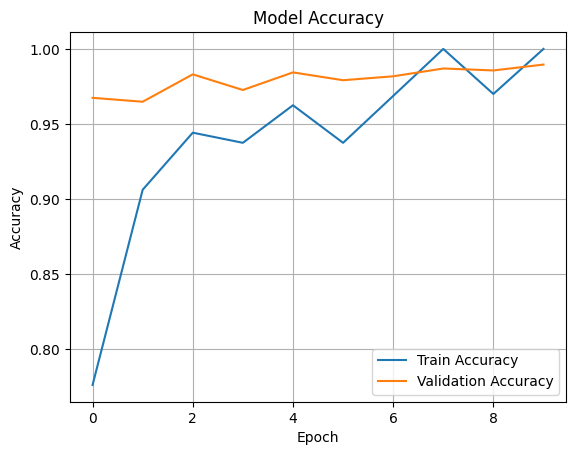

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
